## Delaunay Trangulation / Bowyer-Watson Algorithm
- https://www.youtube.com/watch?v=4ySSsESzw2Y
- https://www.youtube.com/watch?v=rBY2Dzej03A
- https://gorillasun.de/blog/bowyer-watson-algorithm-for-delaunay-triangulation
- https://theor.xyz/mapgen/delaunay-triangulation-triangle-storage/


- [x] Find initial super-triangle
- [x] Find circum-circle for a triangle
- [x] Check if a point exists inside of a circum-circle
- [x] Create new triangles for a new point from an existing triangle

## Find circumcenter of a triangle
https://en.wikipedia.org/wiki/Circumscribed_circle

In [555]:
from typing import List, Tuple
from matplotlib import pyplot
import math
import numpy
from numpy.linalg import norm

def find_circumcenter(a: Tuple[float, float], b: Tuple[float, float], c: Tuple[float, float]):
    # Determinant?
    d = 2 * (a[0] * (b[1] - c[1])\
        + b[0] * (c[1] - a[1])\
        + c[0] * (a[1] - b[1]))
    
    a_sq = (a[0] ** 2) + (a[1] ** 2)
    b_sq = (b[0] ** 2) + (b[1] ** 2)
    c_sq = (c[0] ** 2) + (c[1] ** 2)
    
    x = (a_sq * (b[1] - c[1])\
        + b_sq * (c[1] - a[1])\
        + c_sq * (a[1] - b[1])\
        ) / d
    y = (a_sq * (c[0] - b[0])\
        + b_sq * (a[0] - c[0])\
        + c_sq * (b[0] - a[0])\
        ) / d
    
    r = norm(numpy.array(a) - numpy.array([x, y]))
    
    return x, y, r

### Plot Example

460
0.23478260869565218 -2.9782608695652173 10.980771129277434


(-20.0, 20.0)

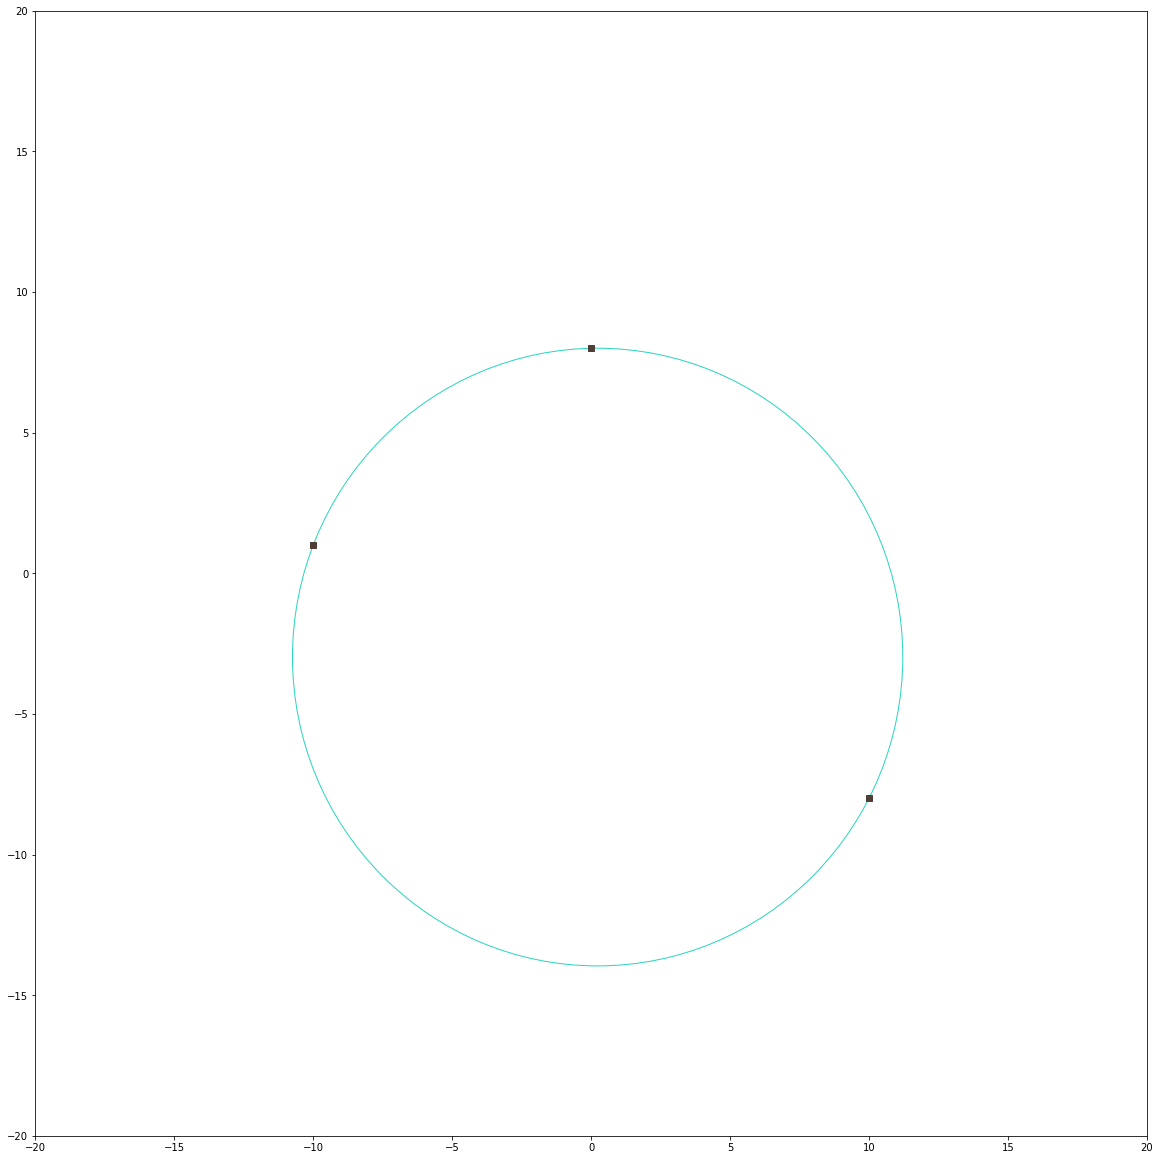

In [540]:
verts = [
    (-10, 1),
    (10, -8),
    (0, 8)
]
x, y, r = find_circumcenter(*verts)
print(x, y, r)
fig, ax = pyplot.subplots(figsize=(16, 16), layout="constrained") 
circumcircle = pyplot.Circle((x, y), r, color="#2ad5bd", fill=False)
for x, y in verts:
    ax.plot(x, y, 's', color='#503e36')
ax.add_artist(circumcircle)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

## Find super-triangle
[Welzl's algorithm](https://en.wikipedia.org/wiki/Smallest-circle_problem#Welzl's_algorithm) implementation ->   [Nayuki](https://www.nayuki.io/page/smallest-enclosing-circle) (they also have a C# implementation)

(-40.0, 40.0)

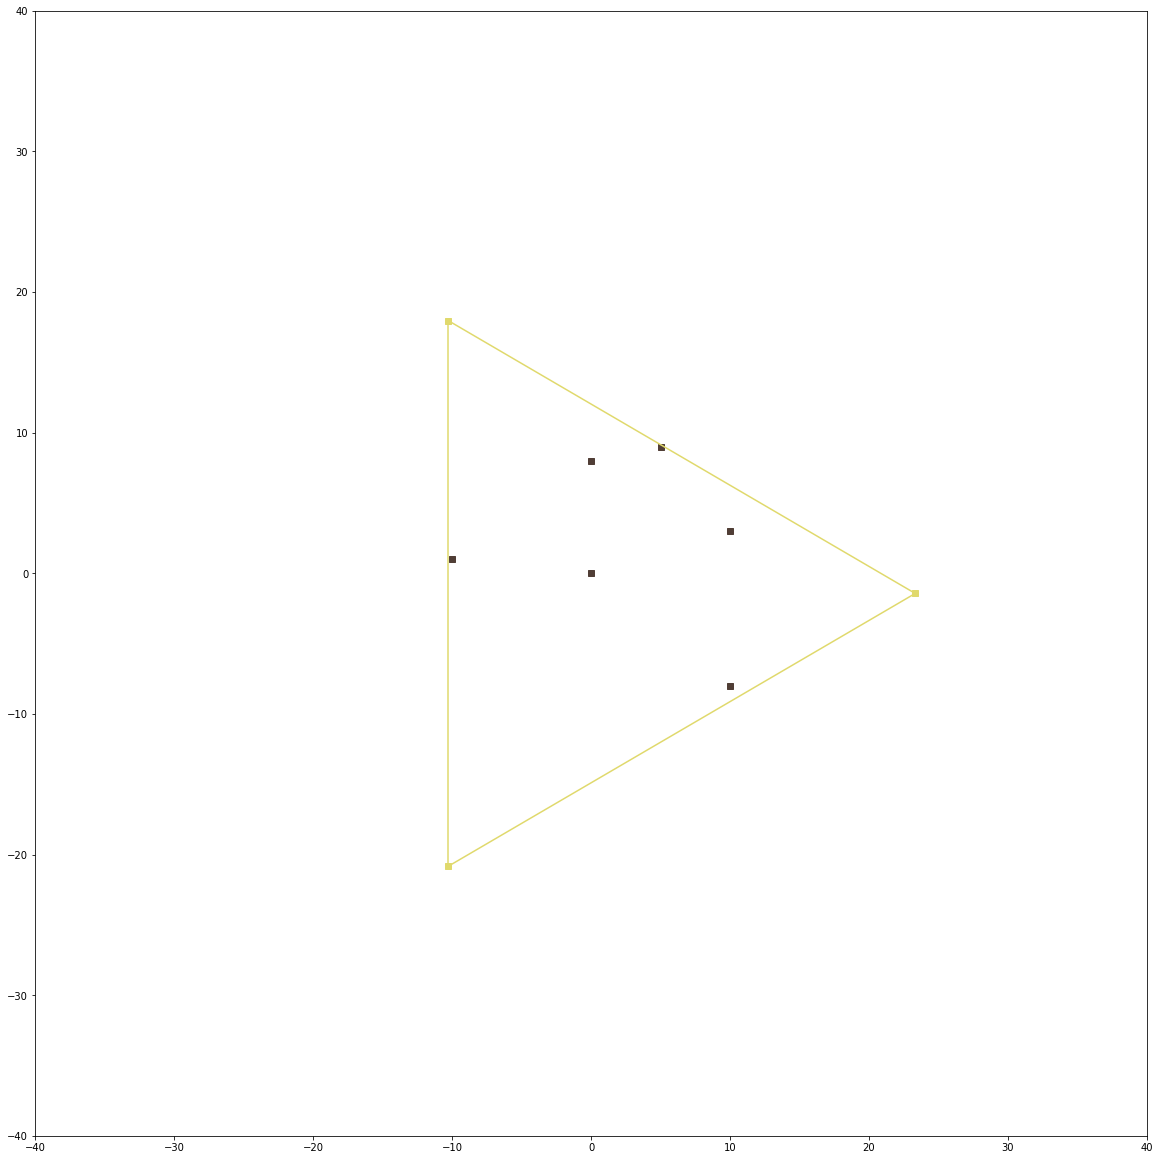

In [551]:
import smallestenclosingcircle as sec

def find_super_triangle(verts):
    """
    Finds a triangle containing all verts.
    First finds the minimum bounding circle then finds the triangle contained in a circle twice the radius.
    """
    x, y, r = sec.make_circle(verts)
    theta = (2 * numpy.pi) / 3
    R1 = numpy.array((
        (numpy.cos(theta), -numpy.sin(theta)),
        (numpy.sin(theta), numpy.cos(theta))
    ))
    theta = 2 * (2 * numpy.pi) / 3
    R2 = numpy.array((
        (numpy.cos(theta), -numpy.sin(theta)),
        (numpy.sin(theta), numpy.cos(theta))
    ))
    theta = 2 * (2 * numpy.pi) / 3
    
    circle_pos = numpy.array((x, y))
    a = numpy.array((x + r * 2, y))
    b = R1.dot(a - circle_pos) + circle_pos
    c = R2.dot(a - circle_pos) + circle_pos
    return a, b, c
    
verts = [
    (0, 0),
    (10, 3),
    (5, 9),
    (-10, 1),
    (10, -8),
    (0, 8)
]

a, b, c = find_super_triangle(verts)
fig, ax = pyplot.subplots(figsize=(16, 16), layout="constrained") 
for a, b in verts:
    ax.plot(a, b, 's', color='#503e36')
for i, pt in enumerate(pts):
    ax.plot(*pt, "s", color="#e0d96c")
    prev_pt = pts[i-1] if i > 0 else pts[-1]
    ax.plot(
        (prev_pt[0], pts[i][0]),
        (prev_pt[1], pts[i][1]),
        color="#e0d96c"
    )

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

## Triangulation Implementation
### Triangle datastructure

In [552]:
import smallestenclosingcircle as sec
import numpy

class Triangle:
    def __init__(self, vert_list, v0, v1, v2):
        self.vert_list = vert_list
        self.v0 = v0
        self.v1 = v1
        self.v2 = v2
        
        self.edges = {
            (v0, v1),
            (v1, v2),
            (v2, v0)
        }
    
    def get_circumcircle(self):
        # smallestenclosingcircle.make_circle doesn't always return the smallest bounding circle
        return find_circumcenter(
            self.vert_list[self.v0],
            self.vert_list[self.v1],
            self.vert_list[self.v2]
        )

    def in_circumcircle(self, x, y):
        u, v, r = self.get_circumcircle()
        d = numpy.linalg.norm(
            numpy.array((u, v)) - numpy.array((x, y))
        )
        return d < r
    
# tri = Triangle(verts, 0, 1, 2)
# tri.get_circumcircle()
# tri.in_circumcircle(1, 0)

### Helper method for plotting triangulation output

In [570]:
def plot_state(verts, edges, circumcircles=set()):
    fig, ax = pyplot.subplots(figsize=(16, 16), layout="constrained") 

    """ Plot circumcircles """
    for c in circumcircles:
        x, y, r = c
        circumcircle = pyplot.Circle((x, y), r, color="#2ad5bd", linestyle="-.", fill=False)
        ax.add_artist(circumcircle)
    
    """ Plot edges """       
    for edge in edges:
        a = verts[edge[0]]
        b = verts[edge[1]]
        ax.plot(
            (a[0], b[0]),
            (a[1], b[1]),
            color="#e0d96c"
        )
        
    """ Plot verts """
    for i, vert in enumerate(verts):
        x, y = vert
        ax.plot(x, y, 's', color='#503e36')
        label = pyplot.text(x, y + 0.5, i, fontsize="medium")
        ax.add_artist(label)
    
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)

### Implementation

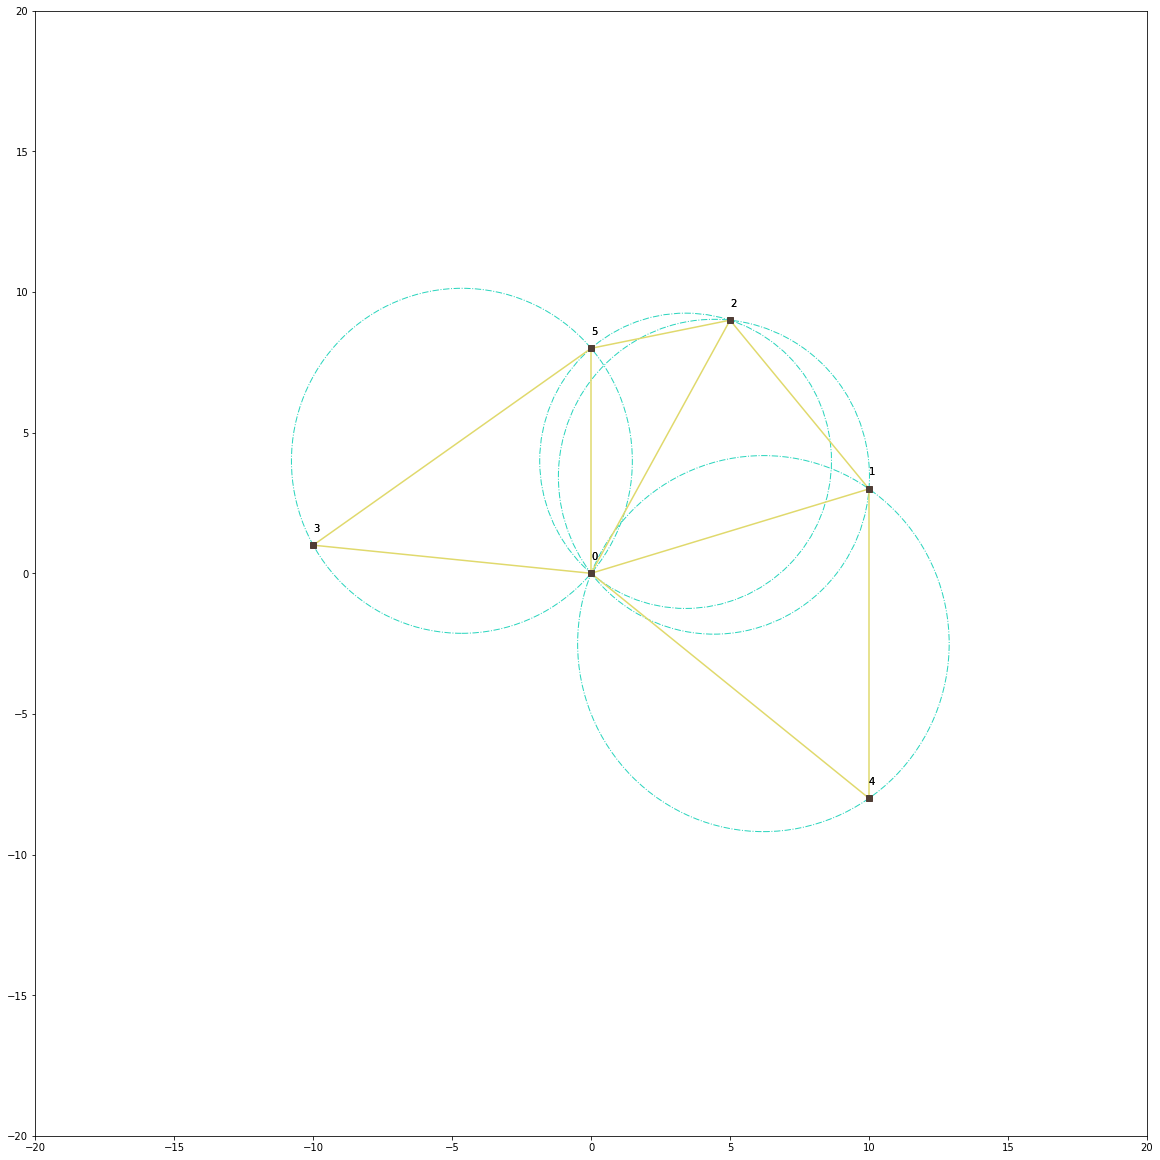

In [571]:
from collections import defaultdict

def triangulate(points):
    """ Returns a set of undirected edges """
    
    verts = []
    verts += [*find_super_triangle(points)]
    tris = [
        Triangle(verts, 0, 1, 2)
    ]
    
    for point in points:
        invalid_tris = []
        for tri in tris:
            if tri.in_circumcircle(point[0], point[1]):
                invalid_tris.append(tri)

        """ Build the bondary polygon """
        polygon = set()
        edge_counts = defaultdict(lambda: 0)
        for tri in invalid_tris:
            for edge in tri.edges:
                # Normalize edges: (2, 1) should be treated as (2, 1)
                if edge[0] > edge[1]: edge = edge[::-1]
                edge_counts[edge] += 1
        for edge, count in edge_counts.items():
            if count == 1:
                polygon.add(edge)

        """ Remove invalid triangles """
        for tri in invalid_tris:
            tris.remove(tri)
#             print("Removed {} {} {}".format(tri.v0, tri.v1, tri.v2))

        """ Create new triangle from evey edge and the current point """
        verts.append(point)
        for edge in polygon:
            a = edge[0] # These are vert indices
            b = edge[1]
            c = len(verts) - 1
            tri = Triangle(verts, a, b, c)
            tris.append(tri)
#             print("Added {} {} {}".format(tri.v0, tri.v1, tri.v2))       
    
    """ Build a list of edges to return, excluding any edges from the super triangle """
    edges = set()
    circumcircles = set()
    for tri in tris:
        tri_verts = {tri.v0, tri.v1, tri.v2}
        if tri_verts & {0, 1, 2}: continue
        
        for edge in tri.edges:
            if edge[0] > edge[1]: edge = edge[::-1]
            edge = (edge[0] - 3, edge[1] - 3)
            edges.add(edge)
            
        """ Return circumcircles too; they're useful for visual debugging """
        circumcircles.add(tri.get_circumcircle())
        
    
    return edges, circumcircles
    
    
edges, circumcircles = triangulate(verts)
plot_state(verts, edges, circumcircles)

### Plot Example

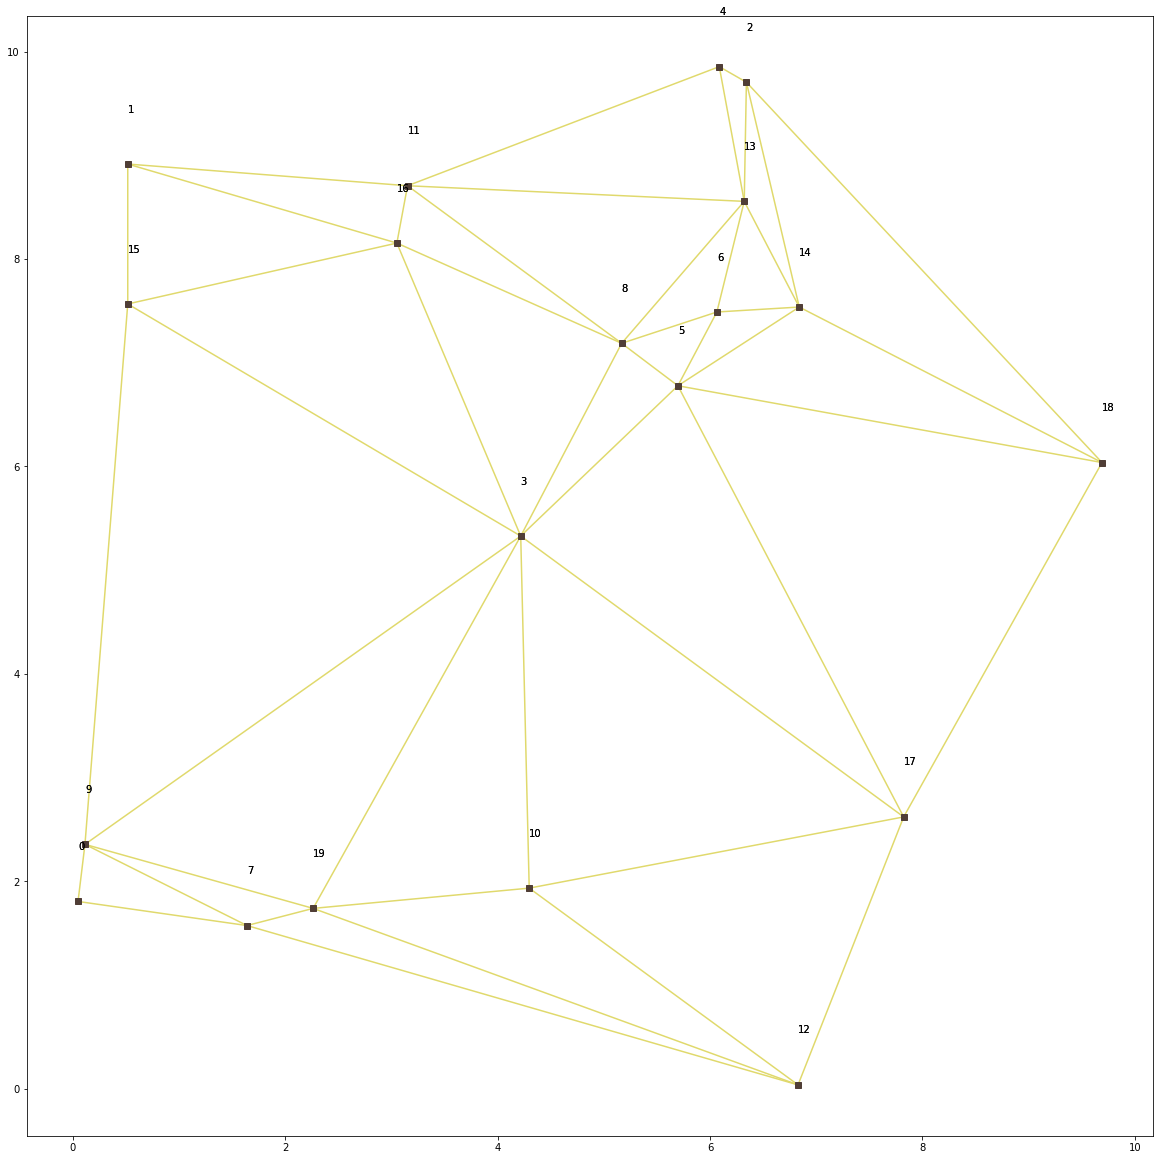

In [534]:
random_verts = [numpy.random.rand(2) * 10 for i in range(0, 20)]
edges, _ = triangulate(random_verts)
plot_state(random_verts, edges)